In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

# EDA

In [2]:
#loading data
df = pd.read_csv('bank-full.csv')

In [3]:
#visualizing first ten rows
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
#describing the date
print('shape:', f'{df.shape}')

shape: (45211, 17)


In [5]:
#checking for null values
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [6]:
#checking data types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
#describing categorial variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Initial Observations
* there are some columns with data type objects although they should be strings
* we have some unknown values for contact column, education and job


## Univariate Analysis

In [8]:
numerical_cols = df._get_numeric_data().columns
categorical_cols = list(set(df.columns) - set (numerical_cols))

age distribution diagram


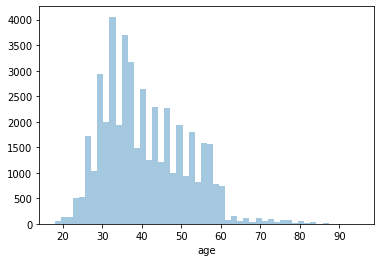

balance distribution diagram


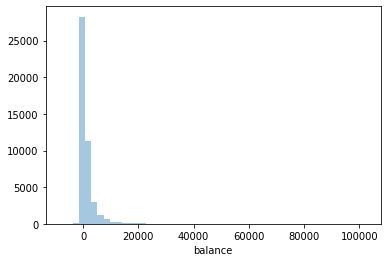

day distribution diagram


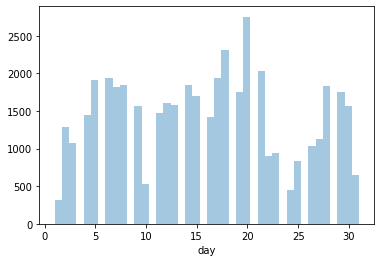

duration distribution diagram


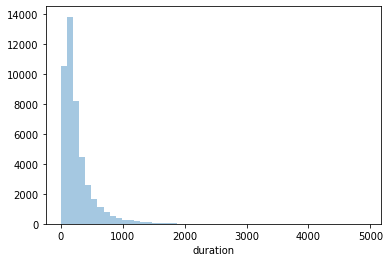

campaign distribution diagram


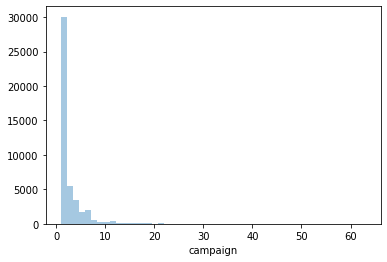

pdays distribution diagram


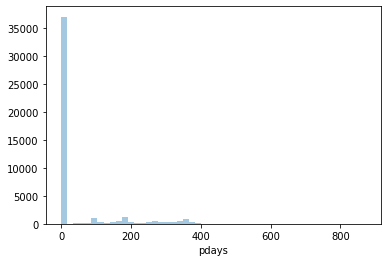

previous distribution diagram


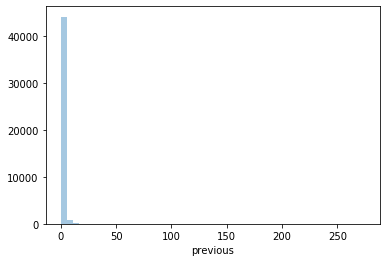

In [9]:
for col in numerical_cols:
    print(f'{col} distribution diagram')
    sns.distplot(df[col], kde=False)
    plt.show()

age distribution diagram


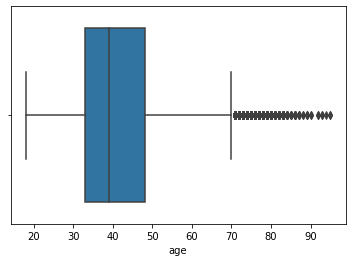

balance distribution diagram


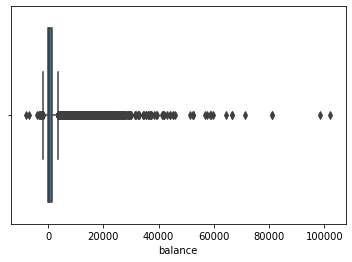

day distribution diagram


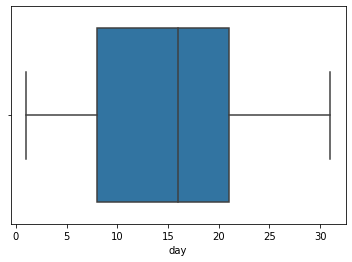

duration distribution diagram


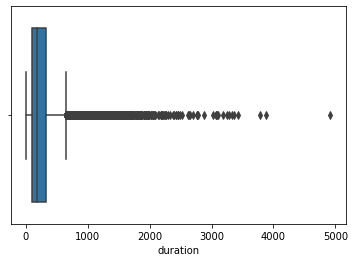

campaign distribution diagram


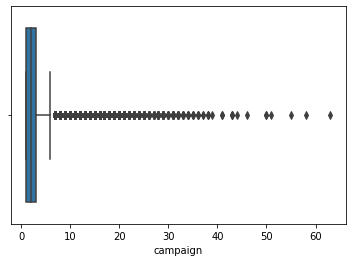

pdays distribution diagram


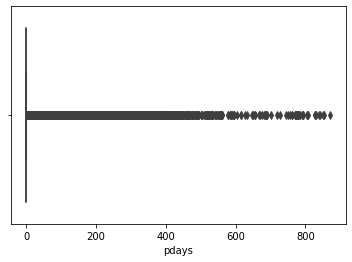

previous distribution diagram


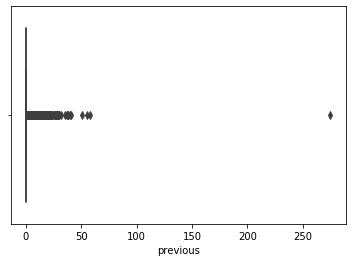

In [10]:
for col in numerical_cols:
    print(f'{col} distribution diagram')
    sns.boxplot(df[col])
    plt.show()

age distribution diagram (View per target)


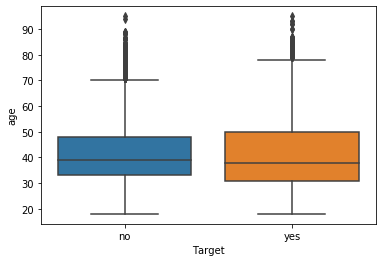

balance distribution diagram (View per target)


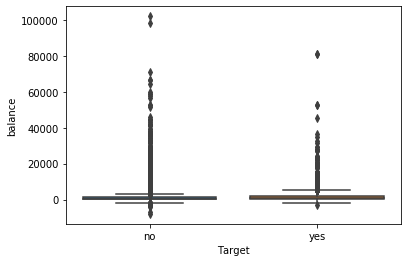

day distribution diagram (View per target)


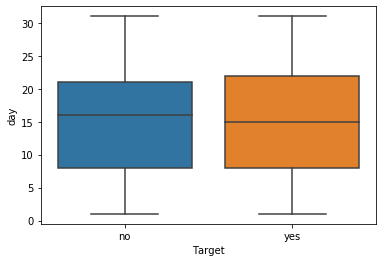

duration distribution diagram (View per target)


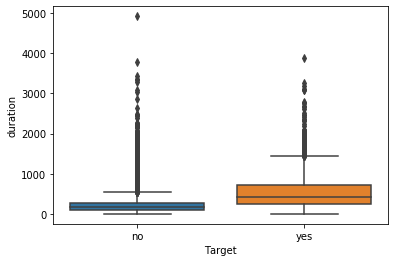

campaign distribution diagram (View per target)


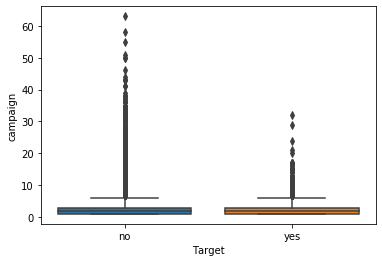

pdays distribution diagram (View per target)


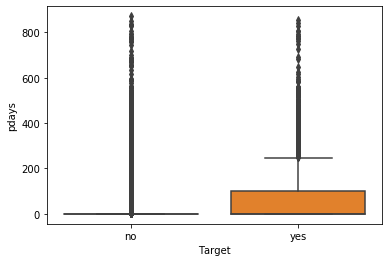

previous distribution diagram (View per target)


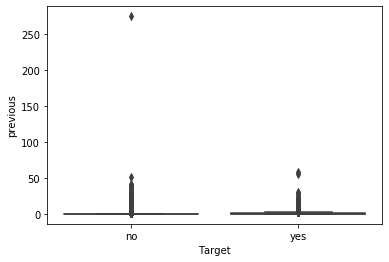

In [11]:
for col in numerical_cols:
    print(f'{col} distribution diagram (View per target)')
    sns.boxplot(df['Target'], df[col])
    plt.show()

job count plot


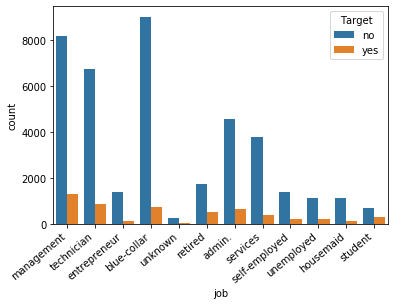

<Figure size 720x720 with 0 Axes>

education count plot


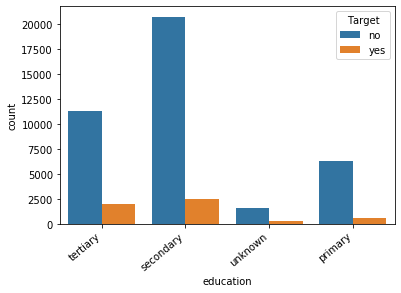

<Figure size 720x720 with 0 Axes>

housing count plot


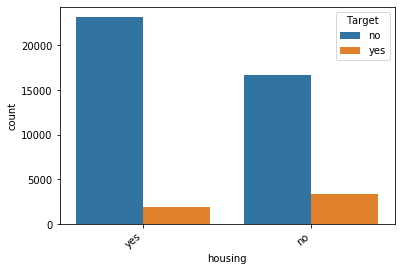

<Figure size 720x720 with 0 Axes>

contact count plot


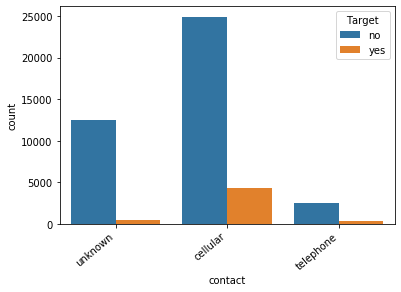

<Figure size 720x720 with 0 Axes>

loan count plot


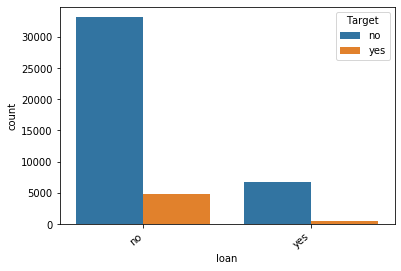

<Figure size 720x720 with 0 Axes>

default count plot


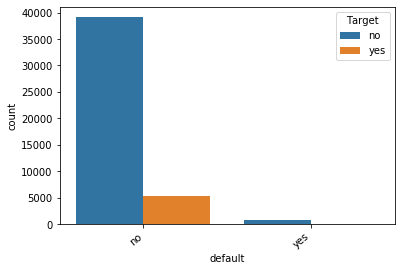

<Figure size 720x720 with 0 Axes>

marital count plot


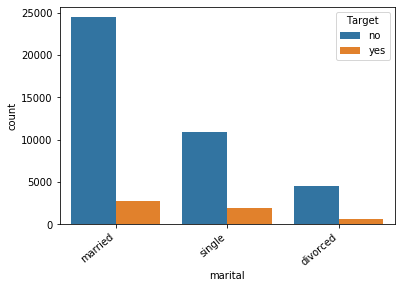

<Figure size 720x720 with 0 Axes>

month count plot


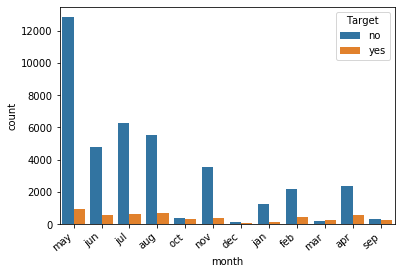

<Figure size 720x720 with 0 Axes>

Target count plot


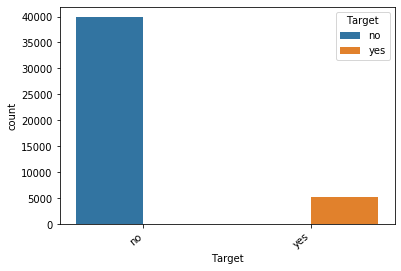

<Figure size 720x720 with 0 Axes>

poutcome count plot


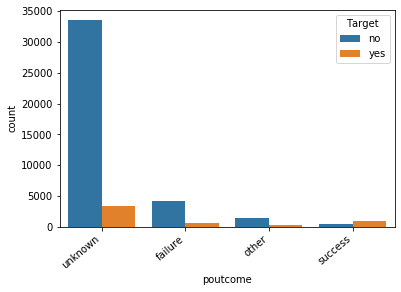

<Figure size 720x720 with 0 Axes>

In [12]:

for col in categorical_cols:
    print(f'{col} count plot')
    ax = sns.countplot(df[col], hue=df['Target'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.figure(figsize=(10, 10))
    plt.show()

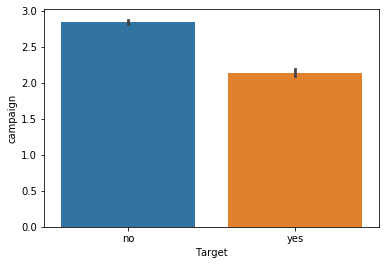

In [13]:
sns.barplot(df['Target'], df['campaign']);
#we said univariate analysis but just doing this to check that target is neccessary ;)

### Univariate Analysis Observations
* all the categorical values seems skewed<br/><br/>
* <b>Age</b> is little bit skewed, but for us to get more relevant info from ages, we are thinking about putting it into buckets, but then again the decision tree should handle that correctly for use.<br/><br/>
* <b>Day</b> looks good, I did a run without any changes on day and the model performance was not good. I decided to group days into three categories: month start, middle month, and month end <br/><br/>
* <b>duration</b> is highly skewed but we feel it's an important variable as it seems the longer the seconds, the more likely they are to accept as shown in the barplot above (note how high the yes bar is although there are a few people that accepted the deposit in the dataset).
* <b>Target</b> There seems to be lot of declined compared to accepted offers for the target, this could hinder the accuracy of our model on a bigger data set. a more balanced data set would have been ideal <br/><br/>

* <b>Education</b>, <b>Contact</b>, <b>Job</b>, <b>Poutcome</b>, have unknown values we need to address. we have decided to drop poutcome as the number of unknow values there is too high and could lead to weirdness, we also saw that dropping the model increased the recall a bit, which is what we are interested in. <br/><br/>
In general, I think decision trees should be able to handle outliers properly due to the way in which they operate. we will first not attempt to remove any outliers and see the results we get.

## Multi variate analysis

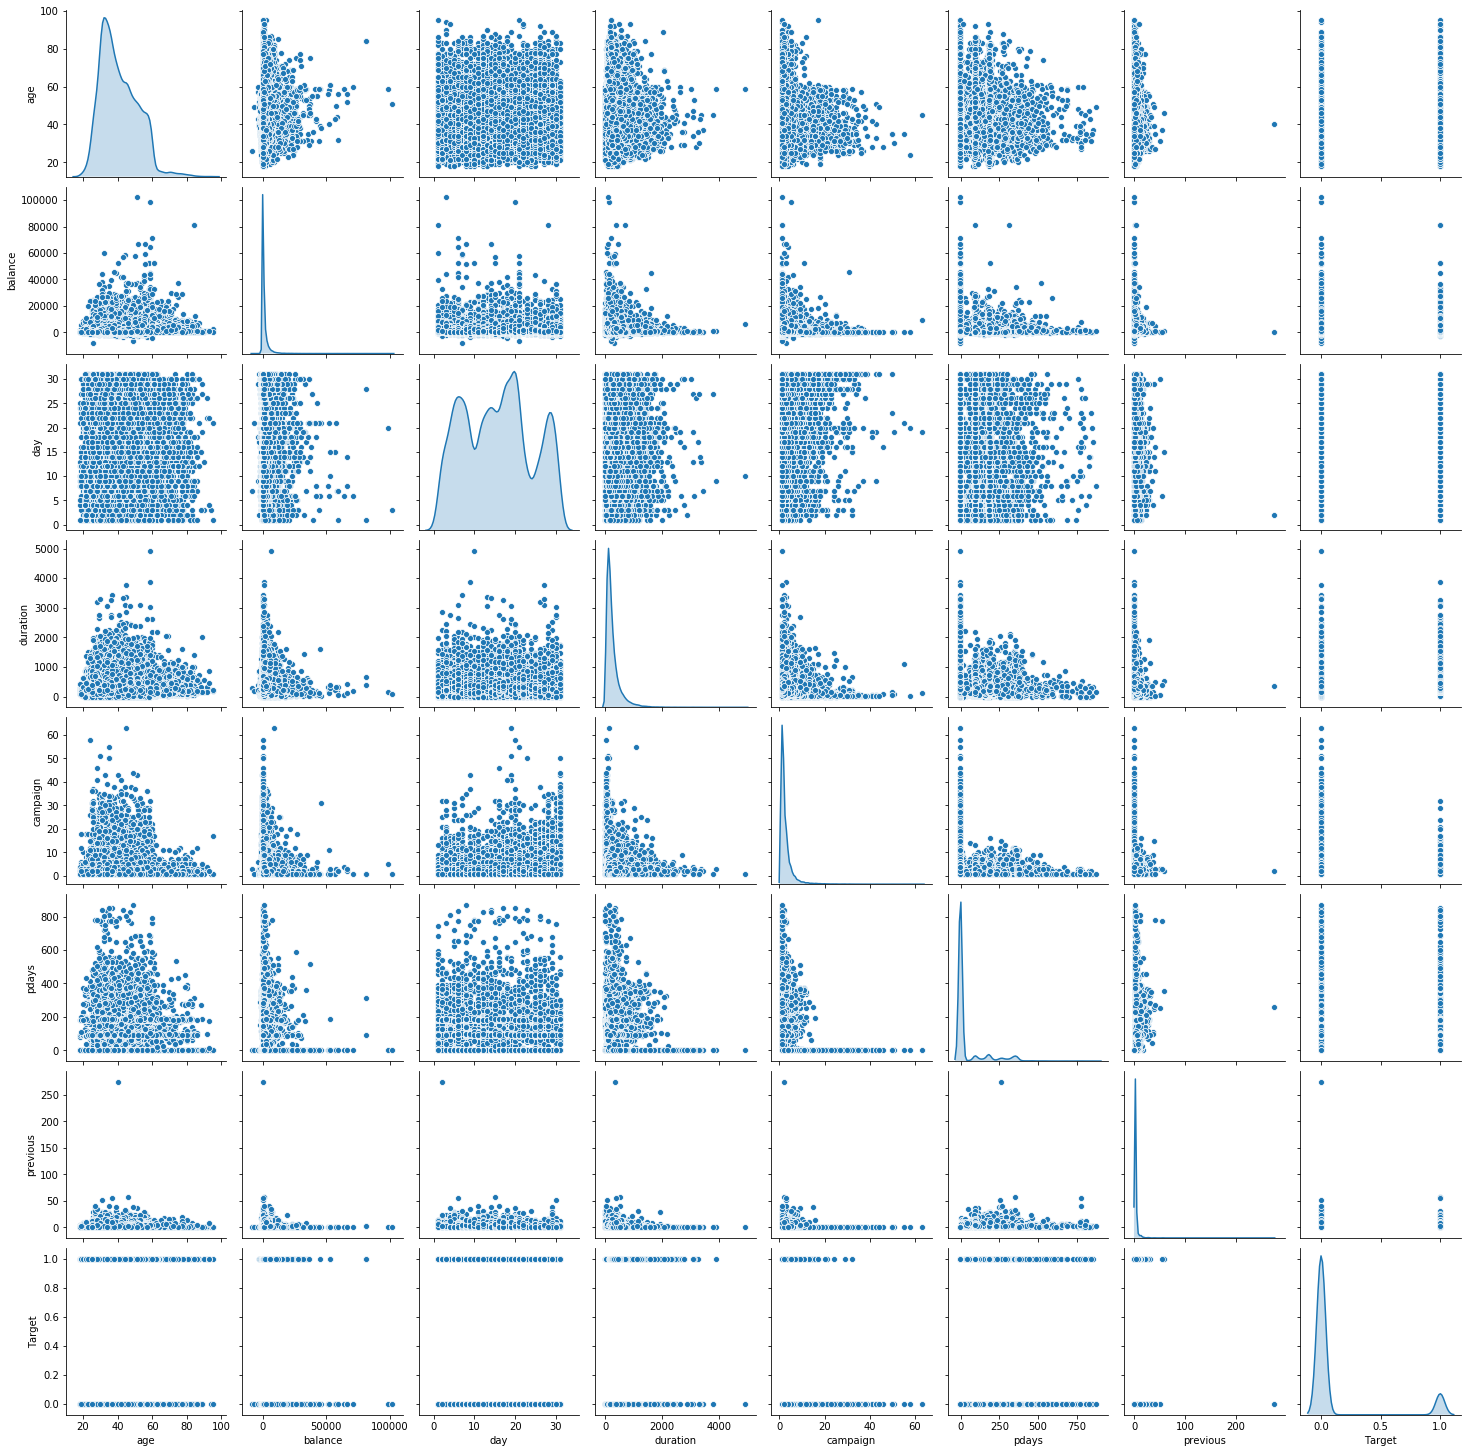

In [14]:
replaceStruct = {
                "Target":     {"no": 0, "yes": 1 }
                }
df=df.replace(replaceStruct)

sns.pairplot(df, diag_kind='kde')

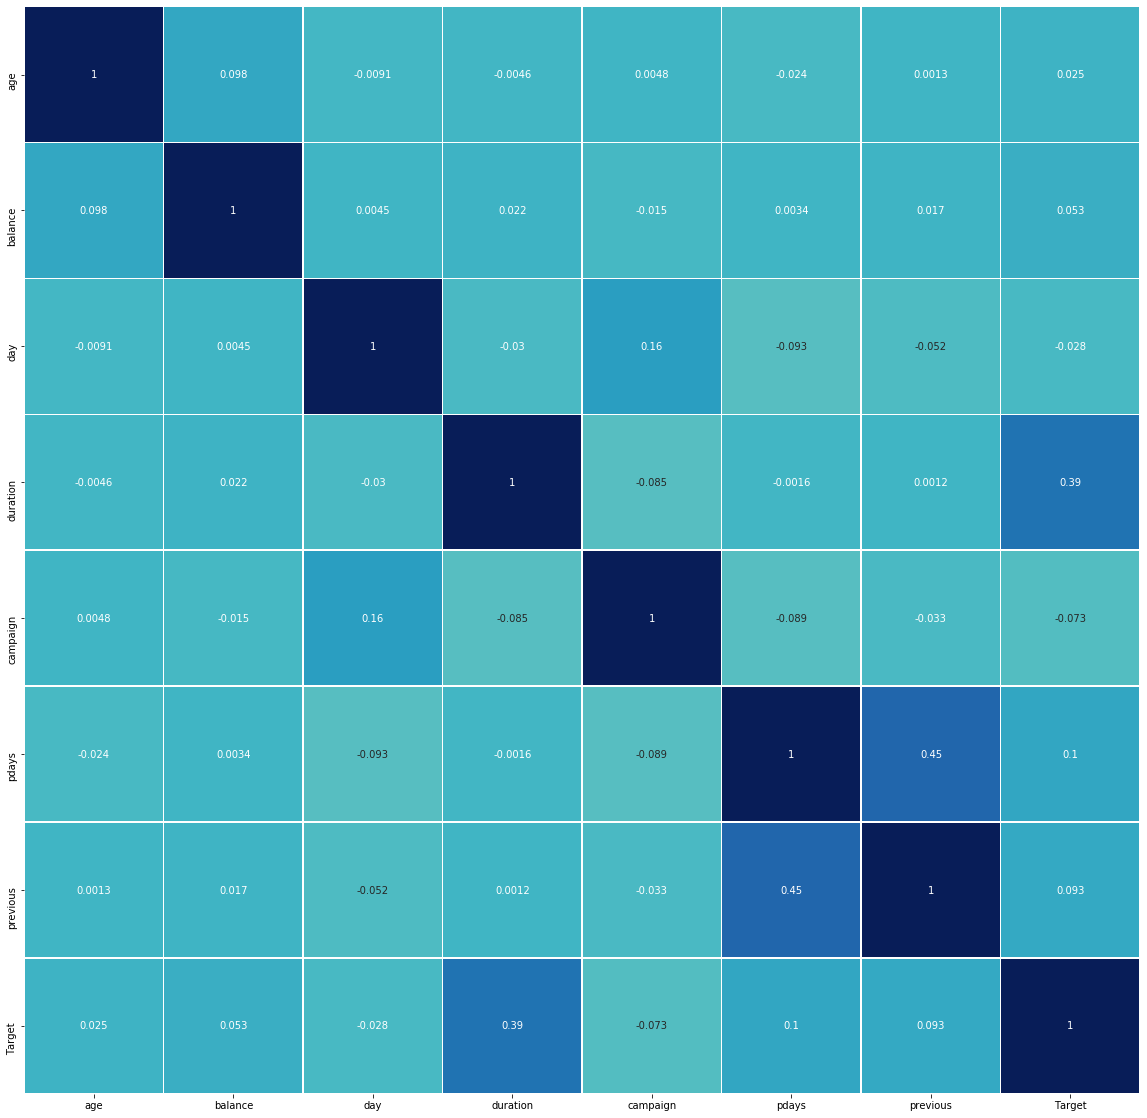

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

### Bivariate Analysis Observations

* apart from the highly skewed duration, pdays, campaign and previous, the data seems fairly well distributed. we will use decision trees here thus there is no need for us to drop a specific column as the tree will decide which columns have a "higher" importance

* there does not seem to be any visible Correlation between the dependent variable and any of independent variables. this will make the model really difficult 

# Prepare the data for analytics

In [16]:
df.dtypes
#although we have objects, they all seem to be strings so we should be good to go.

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target        int64
dtype: object

In [17]:
#Applying various transformations to data

#I have decided to not apply one hot encoding on month, to allow the algorithm to pick up a pattern on season/holidays
df.drop('poutcome', axis=1, inplace=True)
df['month'] = pd.to_datetime(df.month, format='%b').dt.month

#replacing no and yes into 1 and 0
replaceStruct = {
                "default":     {"no": 0, "yes": 1 },
                "housing":     {"no": 0, "yes": 1 } ,
                "loan":     {"no": 0, "yes": 1 }
                }
df=df.replace(replaceStruct)

#grouping days
def format_days(x):
    if x <= 10:
        return int(1); #month start
    elif x <= 20:
        return int(2); #middle month
    elif x <= 31:
        return int(3); #month end   
df['day'] = df['day'].apply(format_days)

#one hot encoding
oneHotcols = ['job','education', 'contact', 'marital']
df=pd.get_dummies(df, columns=oneHotcols, drop_first=True)


# Ensemble model

In [18]:
# defining a function to print out model results
def print_results(model, x_test, y_test, y_predict, x_train, y_train):
    print("Accuracy on train data",model.score(x_train, y_train))
    print("Accuracy on test data",model.score(x_test, y_test))
    print()
    print("Recall:",recall_score(y_test,y_predict))
    print()
    print("Precision:",precision_score(y_test,y_predict))
    print()
    print("F1 Score:",f1_score(y_test,y_predict))
    print()
    print('Confusion Matrix')
    print(draw_cm(y_test,y_predict))

    # defining function to draw confusion matrix
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression

Accuracy on train data 0.8922488703510602
Accuracy on test data 0.8883810085520495

Recall: 0.21589486858573217

Precision: 0.5693069306930693

F1 Score: 0.31306715063520874

Confusion Matrix


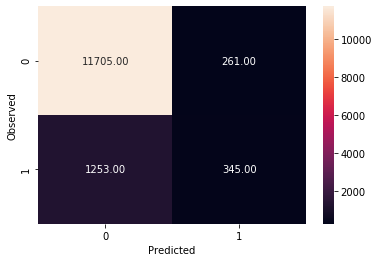

None


In [19]:
#splitting training data set from test data set.
X = df.drop(['Target'], axis=1)
Y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=42)

#Logistic Regression for prediction and getting model performance
logreg = LogisticRegression(random_state=42, solver='liblinear' )
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)
print_results(logreg, x_test, y_test, y_predict, x_train, y_train)

### Decision Tree

Accuracy on train data 0.8998641261414984
Accuracy on test data 0.8928782070185786

Recall: 0.402377972465582

Precision: 0.5635407537248028

F1 Score: 0.4695144213216503

Confusion Matrix


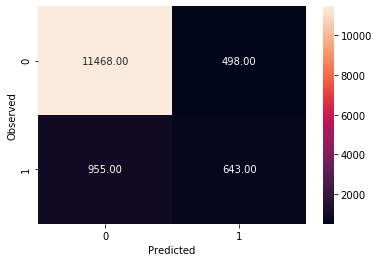

None


In [20]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', random_state=42, max_depth=6)
dTreeR.fit(x_train, y_train)
y_predict = dTreeR.predict(x_test)
print_results(dTreeR, x_test, y_test, y_predict, x_train, y_train)

###### Random Forest

### Notes:
The decision tree performed a little better than the logistic regression as it is more robust against outliers

In [21]:
# Writing results display functions
resultsDf = pd.DataFrame(
    {'Method':['Empty'], 
     'train accuracy': 0, 
     'test accuracy': 0, 
     'recall': 0, 
     'precision': 0,
     'f1 score': 0
    })
resultsDf

def append_results(model_description, model, x_test, y_test, y_predict, x_train, y_train):
    global resultsDf
    tempResultsDf = pd.DataFrame(
        {'Method':[model_description], 
         'train accuracy': model.score(x_train, y_train),
         'test accuracy': model.score(x_test, y_test),
         'recall': recall_score(y_test,y_predict),
         'precision': precision_score(y_test,y_predict),
         'f1 score': f1_score(y_test,y_predict)
        })
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf = resultsDf[['Method', 'train accuracy', 'test accuracy', 'recall', 'precision', 'f1 score']]
    


### RandomForest

In [22]:
for estimators in [50, 100]:
    for criterion in ['gini', 'entropy']:
        for max_features in ["log2", "sqrt", 10]:
            rfcl = RandomForestClassifier(n_estimators=estimators, criterion=criterion, 
                                          max_features=max_features, random_state=42)
            rfcl = rfcl.fit(x_train, y_train)
            y_predict = rfcl.predict(x_test)
            append_results(f'random forest {estimators} {criterion} {max_features}'
                          ,dTreeR, x_test, y_test, y_predict, x_train, y_train)

In [23]:
resultsDf.head(15)

,Method,train accuracy,test accuracy,recall,precision,f1 score
0,Empty,0.000000,0.000000,0.000000,0.000000,0.000000
0,random forest 50 gini log2,0.899864,0.892878,0.324781,0.624549,0.427336
0,random forest 50 gini sqrt,0.899864,0.892878,0.367960,0.627535,0.463905
0,random forest 50 gini 10,0.899864,0.892878,0.411765,0.611524,0.492147
0,random forest 50 entropy log2,0.899864,0.892878,0.331039,0.633533,0.434854
0,random forest 50 entropy sqrt,0.899864,0.892878,0.352941,0.638732,0.454655
0,random forest 50 entropy 10,0.899864,0.892878,0.404881,0.617956,0.489225
0,random forest 100 gini log2,0.899864,0.892878,0.334168,0.634958,0.437884
0,random forest 100 gini sqrt,0.899864,0.892878,0.371715,0.632588,0.468270
0,random forest 100 gini 10,0.899864,0.892878,0.431164,0.616831,0.507551


## Bagging classifier

In [24]:
resultsDf = resultsDf[resultsDf['recall'] > 0.43]

In [25]:
bgcl = BaggingClassifier(n_estimators=100, max_samples= 10, bootstrap=True, oob_score=True, random_state=42)
bgcl = bgcl.fit(x_train, y_train)
y_predict = rfcl.predict(x_test)
append_results(f'ada boosting'
              ,dTreeR, x_test, y_test, y_predict, x_train, y_train)

In [26]:
resultsDf.head(10)

,Method,train accuracy,test accuracy,recall,precision,f1 score
0,random forest 100 gini 10,0.899864,0.892878,0.431164,0.616831,0.507551
0,random forest 100 entropy 10,0.899864,0.892878,0.431164,0.629224,0.511697
0,ada boosting,0.899864,0.892878,0.431164,0.629224,0.511697


### Gradient Boost

In [27]:
gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=42, max_depth=6)
gbcl = gbcl.fit(x_train, y_train)
y_predict = gbcl.predict(x_test)
append_results(f'gradient boosting'
              ,dTreeR, x_test, y_test, y_predict, x_train, y_train)

In [28]:
resultsDf.head(10)

,Method,train accuracy,test accuracy,recall,precision,f1 score
0,random forest 100 gini 10,0.899864,0.892878,0.431164,0.616831,0.507551
0,random forest 100 entropy 10,0.899864,0.892878,0.431164,0.629224,0.511697
0,ada boosting,0.899864,0.892878,0.431164,0.629224,0.511697
0,gradient boosting,0.899864,0.892878,0.444305,0.624450,0.519196


# Conclusion
Based on the number of estimators that had the highest results for random forest, I used that same number in bagging classifier and gradient boost and it turns out the best model is gradient boost. it is the best model because it has the highest recall which is the value I believe we are interested in as we want to have identify as much potential customers as possible 